In [123]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy
from scipy.optimize import curve_fit
import glob
import os
%matplotlib widget

In [2]:
#pip install tabulate

In [6]:
#IV_array = helium_data_frames["/Users/denissecordovacarrizales/Documents/Physics_191/Plasma/Data/IR/Helium1000V845mT-60-0range1step.txt"][df_columns[0:2]].to_numpy()
#current in first column. voltage in second column

#shape = int(np.shape(IV_array)[0])

#current_min = shape - shape%6 # the positive current starts in the last sixth of the array. we can only use positive current because the logarithm input in line 68 cannot be negative
#current_max = shape 



#linear_current_array = np.log(IV_array[current_min: current_max,1])#according to Wissel paper 


#linear_ansatz_T_e = np.gradient(linear_current_array, 1) * 1/k #according to Wissel paper 
#linear_ansatz_T_e = np.average(linear_ansatz_T_e) #guess of the electron temperature. just approximating to first order with an average 


#print(linear_ansatz_T_e)
##V_float_ansatz = -40 #the voltage where the current turns positive. found it by eye
#V_plasma_ansatz = V_float_ansatz + (k*linear_ansatz_T_e/2)*np.log(2*m_i/(np.pi*m_e)) #from Wissel paper 
#fit = scipy.optimize.curve_fit(exponential, helium_data_frames["/Users/denissecordovacarrizales/Documents/Physics_191/Plasma/Data/IR/Helium1000V845mT-60-0range1step.txt"][df_columns[0]], helium_data_frames["/Users/denissecordovacarrizales/Documents/Physics_191/Plasma/Data/IR/Helium1000V845mT-60-0range1step.txt"][df_columns[1]] , [V_plasma_ansatz, linear_ansatz_T_e ])
#print(fit)

#plt.plot(fit, IV_array[:, 1])
#print("hello")

/Users/dcordovacarrizales/Documents/GitHub/Physics_191/Plasma/Data/IR/Helium1000V845mT-60-0range1step.txt
/Users/dcordovacarrizales/Documents/GitHub/Physics_191/Plasma/Data/IR/Helium1000V661mT-60-0range1step.txt


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
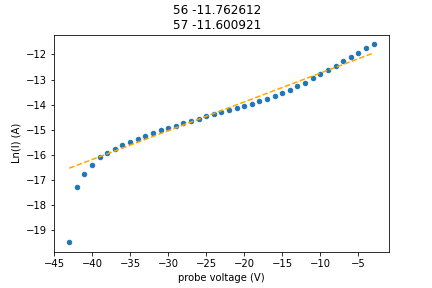

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
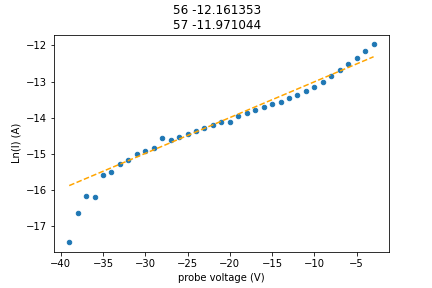

In [125]:
path = os.getcwd()
txt_files = glob.glob(os.path.join(path, "*.txt"))
argon_data_frames = {}
helium_data_frames = {}

def creation_dict_dataframes(txt_files):
    i = 0
    for file in txt_files: 
        df = pd.read_csv(file)
        df = df.drop(columns='Unnamed: 5')
        df = df.dropna(axis =0)
        df_columns = df.keys()
        df = df.astype('float64')

        if "Helium" in file: 
            helium_data_frames[file] =  df
        else: 
            argon_data_frames[file]= df
        i += 1
        
    return argon_data_frames, helium_data_frames

argon_data_frames, helium_data_frames = creation_dict_dataframes(txt_files)

#/Users/denissecordovacarrizales/Documents/Physics_191/Plasma/Data/IR/Helium1000V845mT-60-0range1step.txt
#There are only two files with good data. This file is the best one.  


m_e = 9.10938356 * 10**(-31)
m_i = (6.6335209 * 10**(-26)) - (9.10938356 * 10**(-31)) #neutral minus electron
k = 8.617333262145 * 10**(-5) #electronvolts The k constant actually doesn't matter that much because it gets cancelled out in line 66
e = 1.60217662 * 10**(-19) #charge of electron in coloumbs
c = 299792458

def exponential(V_bias, V_plasma, T_e):
    """ 
    function we are trying to fit to
    """
    I_electron = np.exp(-e*(V_plasma - V_bias)/(k*T_e))
    return I_electron                                                                                                                          

def calculation_ln_I(dict_gas_dataframes):
    for key in dict_gas_dataframes: 
        ln_I_list = []
        for index, row in dict_gas_dataframes[key][' probe current (A)'].iteritems():
            if row > 0: 
                ln_I_list.append(np.log(row))
            else: 
                ln_I_list.append(0)
        dict_gas_dataframes[key]["Ln(I)"] = ln_I_list
        
    return dict_gas_dataframes



def line(x, m, b):
    return m*x + b

        
def plots(dict_gas_dataframe):  
    i = 0
    for df in dict_gas_dataframe:
        
        if i in [23, 25]:
            print(df)
            df = dict_gas_dataframe[df]
            df_columns = df.keys()
            fig = plt.figure()
            ax = fig.add_subplot(111)

                #df.plot(df_columns[0], df_columns[1],  title = str(df) + str(i) , ax =ax)
            df.drop(df.index[df['Ln(I)'] == 0], inplace=True)

            df.plot.scatter(df_columns[0], df_columns[5],  title = str(df), ax =ax)
            
            
            #print(df[df_columns[0]].iloc[8:])
            #print(df[df_columns[5]].iloc[8:])
            
            popt, pcov = curve_fit(line, df[df_columns[0]].iloc[8:], df[df_columns[5]].iloc[8:])
            
            
            plt.plot(df[df_columns[0]], line(df[df_columns[0]], *popt), '--',c='orange')
            plt.errorbar()
            plt.ylabel("Ln(I) (A)")
            electron_temperature = 1/popt[0]
            
            #plt.savefig("helium electron temperature ln(I) vs V")
            #print("Helium Electron Temperature:", str(electron_temperature), " eV")
            
            #print(popt)

            #plt.plot(x, m*x + b)
            #df_derivative = df.diff(periods = 19)
            #df["dln(I)"] = df_derivative[df_columns[5]]
            #df["dV"] = df_derivative[df_columns[0]]

            #df.plot.scatter("dln(I)", "dV", ax =ax)
                #print(df)

            #df["Mean dV"] = df["dV"].mean()
            #df.plot( "dln(I)" , "Mean dV", ax =ax , color = "green")

            #electron_temp =  df["Mean dV"].iloc[0]/(k)

            #print(electron_temp)
            #print(df["Mean dV"])
            #plt.ylabel("Probe Current (A)")
            #plt.xlabel("Probe Voltage (V)")
        
        i += 1 
    



helium_data_frames = calculation_ln_I(helium_data_frames)
plots(helium_data_frames)  

#current in the systema at zero voltage should be the I0
#I = I0 e^(-V/kT)


## 

In [5]:
import matplotlib.pyplot as plt
for i in range(len(data_frames)):
#     print(type(i))
#     print(i.keys())
    probe_voltage = data_frames[i]['probe voltage (V)']
    probe_current = data_frames[i][' probe current (A)']
    plt.plot(probe_voltage, probe_current)
    

NameError: name 'data_frames' is not defined

In [ ]:
len(data_frames[0])

In [ ]:
data_frames[0][' probe current (A)']